In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
	df = pd.read_csv('/home/dushyant-kumar-gedam/Desktop/Coding/Github/Kerla-free-wifi-location/Kwifi.csv')
except UnicodeDecodeError:
	df = pd.read_csv('/home/dushyant-kumar-gedam/Desktop/Coding/Github/Kerla-free-wifi-location/Kwifi.csv', encoding='cp1252')

In [3]:
df

,SL NO,District,Location Name As Per List,Location Address,Location Category,Hotspot included in Phase
0,1,Thiruvananthapuram,Akkulam childrens park,"Aluvila Rd,Akkulam,Tvm,kerala 695011",Tourist Place,Phase-2
1,2,Thiruvananthapuram,"Amboori Panchayath Office,","amboori neyyar road, Amboori, Kerala 695505",Panchayat office,Phase-1
2,3,Thiruvananthapuram,Anad Panchayath Office,"Anad, Kerala 695541 / Post office at Anad Bank...",Panchayat office,Phase-1
3,4,Thiruvananthapuram,Andoorkonam Panchayath Office,"Kaniyapuram, Kerala 695301",Panchayat office,Phase-1
4,5,Thiruvananthapuram,APJ Abdul Kalam Technological University,APJ Abdul Kalam Technological University CET C...,University/College,Phase-2
...,...,...,...,...,...,...
2018,2019,Thiruvananthapuram,Niyamasabha-Admin Block- Fourth Floor1,"Vikas Bhavan,Palayam, PMG road,Near hanuman Te...",Govt Office,Phase-2
2019,2020,Thiruvananthapuram,Niyamasabha-Admin Block- Fourth Floor2,"Vikas Bhavan,Palayam, PMG road,Near hanuman Te...",Govt Office,Phase-2
2020,2021,Thiruvananthapuram,Niyamasabha-Admin Block- Third Floor,"Vikas Bhavan,Palayam, PMG road,Near hanuman Te...",Govt Office,Phase-2
2021,2022,Thiruvananthapuram,Niyamasabha-Admin Block- Second Floor1,"Vikas Bhavan,Palayam, PMG road,Near hanuman Te...",Govt Office,Phase-2


In [4]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 10


In [5]:
df.columns = df.columns.str.replace(' ', '_').str.replace('As_Per_List', '').str.strip('_')

In [6]:
df.rename(columns={'Hotspot_included_in_Phase': 'Phase'}, inplace=True)


In [7]:
print(f"\nTotal Hotspots: {len(df)}")
print(f"Number of Unique Districts: {df['District'].nunique()}")
print(f"Number of Unique Location Categories: {df['Location_Category'].nunique()}")



Total Hotspots: 2023
Number of Unique Districts: 14
Number of Unique Location Categories: 44



--- 1. Hotspot Distribution by District ---
| District           | count   |
|:-------------------|:--------|
| Ernakulam          | 231     |
| Thiruvananthapuram | 198     |
| Thrissur           | 167     |
| Kannur             | 161     |
| Malappuram         | 150     |
| Kozhikode          | 148     |
| Kollam             | 144     |
| Pathanamthitta     | 136     |
| Kottayam           | 136     |
| Kasaragod          | 130     |
| Palakkad           | 130     |
| Alleppey           | 122     |
| Wayanad            | 90      |
| Idukki             | 80      |


/tmp/ipykernel_107513/1323080925.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


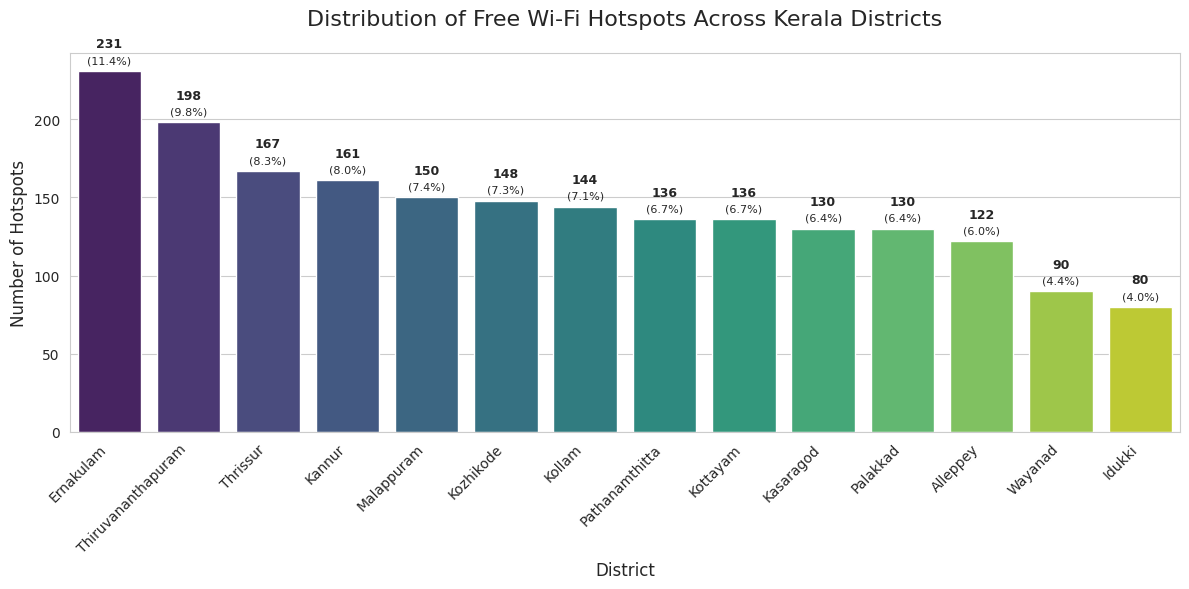

In [ ]:
def analyze_by_district(data):
    """Calculates and visualizes the distribution of hotspots across districts."""
    
    # Count the number of hotspots per district
    district_counts = data['District'].value_counts().sort_values(ascending=False)
    
    # Calculate the percentage
    district_percentages = (district_counts / len(data)) * 100
    
    print("\n--- 1. Hotspot Distribution by District ---")
    print(district_counts.to_markdown(numalign="left", stralign="left"))
    
    # Plotting the data
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=district_counts.index, 
        y=district_counts.values, 
        palette="viridis"
    )
    
    plt.title('Distribution of Free Wi-Fi Hotspots Across Kerala Districts', fontsize=16, pad=20)
    plt.xlabel('District', fontsize=12)
    plt.ylabel('Number of Hotspots', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Adding value labels to the bars
    for i, count in enumerate(district_counts.values):
        percentage = district_percentages.iloc[i]
        plt.text(i, count + 15, f'{count}', ha='center', fontsize=9, fontweight='bold')
        # Add percentage below the count
        plt.text(i, count + 5, f'({percentage:.1f}%)', ha='center', fontsize=8)
    
    plt.tight_layout()
    plt.show()

analyze_by_district(df)


--- 2. Top 10 Hotspot Categories Summary ---


,Hotspot Count,Percentage
Location_Category,,
Panchayat office,592,29.3%
Hospital,202,10.0%
Govt Office,155,7.7%
Village Office,142,7.0%
Bus Stand,105,5.2%
Civi Station/Mini Civil station,98,4.8%
Tourist Place,81,4.0%
Block Office,76,3.8%
University/College,66,3.3%


/tmp/ipykernel_107513/4138117666.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


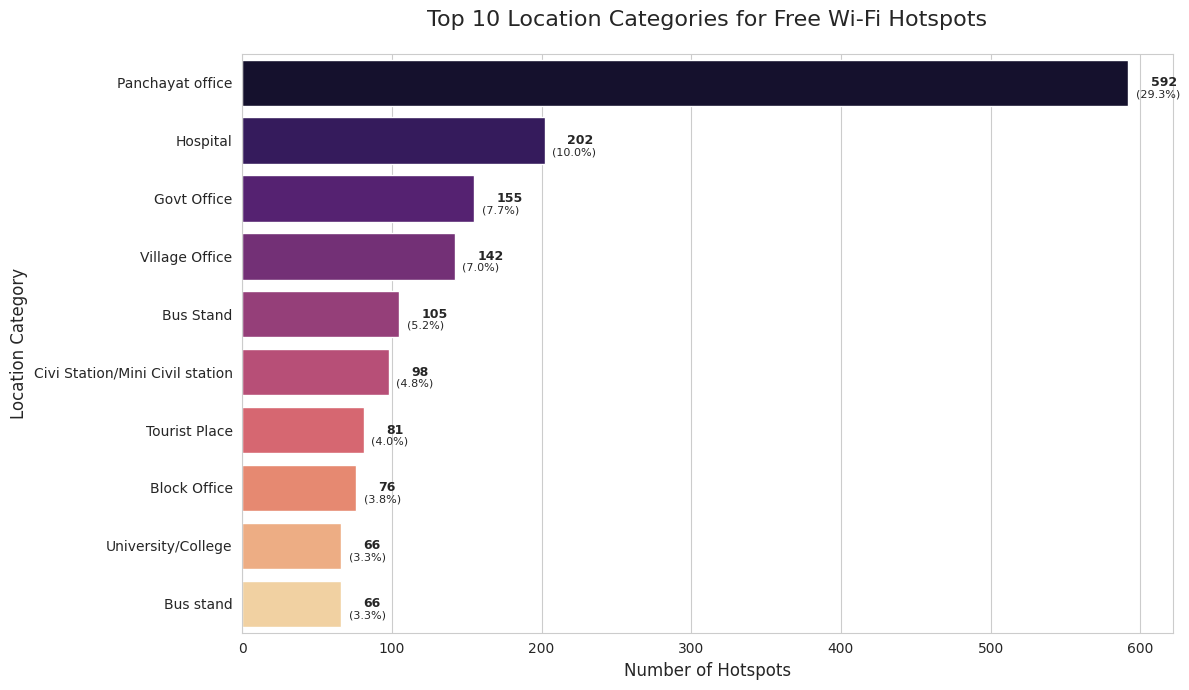

In [9]:
def analyze_by_category(data, top_n=10):
    """Calculates, displays, and visualizes the distribution of hotspots by location category."""
    
    # Count the number of hotspots per category
    category_counts = data['Location_Category'].value_counts()
    
    # Select the top N categories
    top_categories = category_counts.head(top_n)
    
    # Calculate the percentage for top N categories
    top_category_percentages = (top_categories / len(data)) * 100

    # Combine counts and percentages into a DataFrame for clean notebook output
    category_summary = pd.DataFrame({
        'Hotspot Count': top_categories,
        'Percentage': top_category_percentages.round(1).astype(str) + '%'
    })
    
    print(f"\n--- 2. Top {top_n} Hotspot Categories Summary ---")
    # Display the summary table directly (notebook style)
    display(category_summary)
    
    # Plotting the data
    plt.figure(figsize=(12, 7))
    sns.barplot(
        y=top_categories.index, 
        x=top_categories.values, 
        palette="magma"
    )
    
    plt.title(f'Top {top_n} Location Categories for Free Wi-Fi Hotspots', fontsize=16, pad=20)
    plt.xlabel('Number of Hotspots', fontsize=12)
    plt.ylabel('Location Category', fontsize=12)
    
    # Adding value labels to the bars
    for i, count in enumerate(top_categories.values):
        percentage = top_category_percentages.iloc[i]
        # Position the text slightly after the bar end
        plt.text(count + 15, i, f'{count}', va='center', fontsize=9, fontweight='bold')
        plt.text(count + 5, i + 0.2, f'({percentage:.1f}%)', va='center', fontsize=8)

    plt.tight_layout()
    plt.show()
analyze_by_category(df, top_n=10)


--- 3. Hotspot Distribution by Implementation Phase Summary ---
| Phase   | Hotspot Count   | Percentage   |
|:--------|:----------------|:-------------|
| Phase-2 | 1023            | 50.6%        |
| Phase-1 | 1000            | 49.4%        |


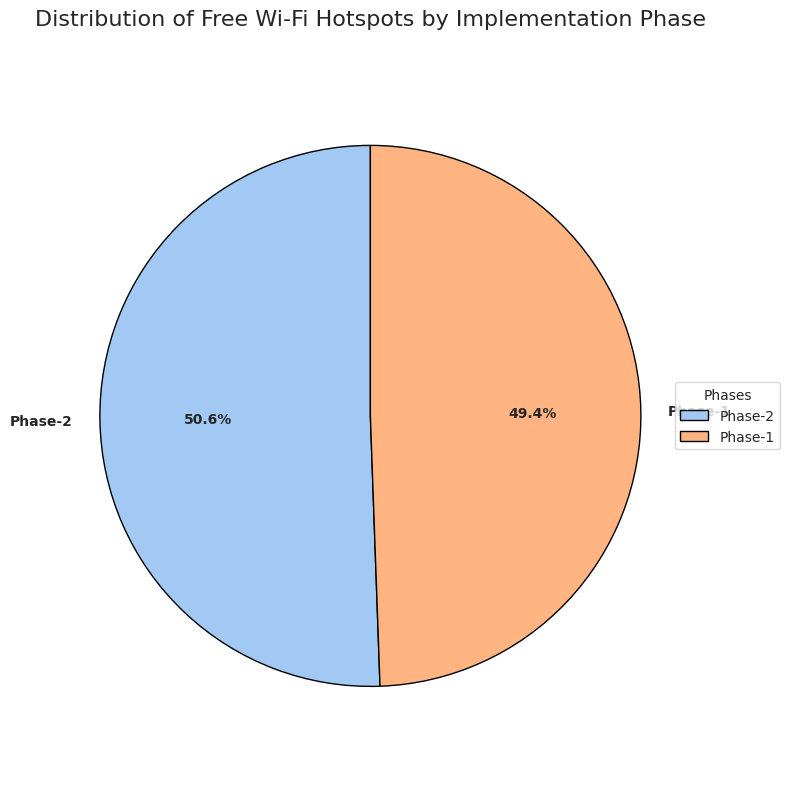

In [12]:
def analyze_by_phase(data):
    """Calculates, displays, and visualizes the distribution of hotspots by implementation phase using a pie chart."""
    
    # Count the number of hotspots per phase
    phase_counts = data['Phase'].value_counts()
    
    # Calculate the percentage
    phase_percentages = (phase_counts / len(data)) * 100
    
    # Combine counts and percentages into a DataFrame for clean output
    phase_summary = pd.DataFrame({
        'Hotspot Count': phase_counts,
        'Percentage': phase_percentages.round(1).astype(str) + '%'
    })
    
    print("\n--- 3. Hotspot Distribution by Implementation Phase Summary ---")
    # Display the summary table
    print(phase_summary.to_markdown(numalign="left", stralign="left"))
    
    # Plotting the data as a Pie Chart
    plt.figure(figsize=(8, 8)) # Use a square figure size for a better-looking pie chart
    
    # Prepare labels including count and percentage (for legend)
    # The pie chart's autopct will handle the in-slice percentages
    
    # Use a custom color palette for the slices
    colors = sns.color_palette('pastel')[0:len(phase_counts)]
    
    plt.pie(
        phase_counts.values, 
        labels=phase_counts.index, # Use phase names for standard pie labels
        colors=colors, 
        autopct='%1.1f%%',        # Format the percentage display on the chart
        startangle=90,            # Start the first slice at the top
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}, # Add border for separation
        textprops={'fontsize': 10, 'fontweight': 'bold'}
    )
    
    plt.title('Distribution of Free Wi-Fi Hotspots by Implementation Phase', fontsize=16, pad=20)
    plt.legend(
        phase_counts.index, 
        title="Phases", 
        loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1) # Move legend outside
    )
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.tight_layout()
    plt.show()

analyze_by_phase(df)


--- 4. Phase Distribution within Top 10 Categories Summary (Stacked Bar Data) ---
| Location_Category               | Phase-1   | Phase-2   |
|:--------------------------------|:----------|:----------|
| Panchayat office                | 416       | 176       |
| Bus Stand                       | 72        | 33        |
| Hospital                        | 71        | 131       |
| Block Office                    | 58        | 18        |
| Govt Office                     | 58        | 97        |
| Civi Station/Mini Civil station | 51        | 47        |
| Bus stand                       | 36        | 30        |
| Village Office                  | 27        | 115       |
| University/College              | 21        | 45        |
| Tourist Place                   | 20        | 61        |


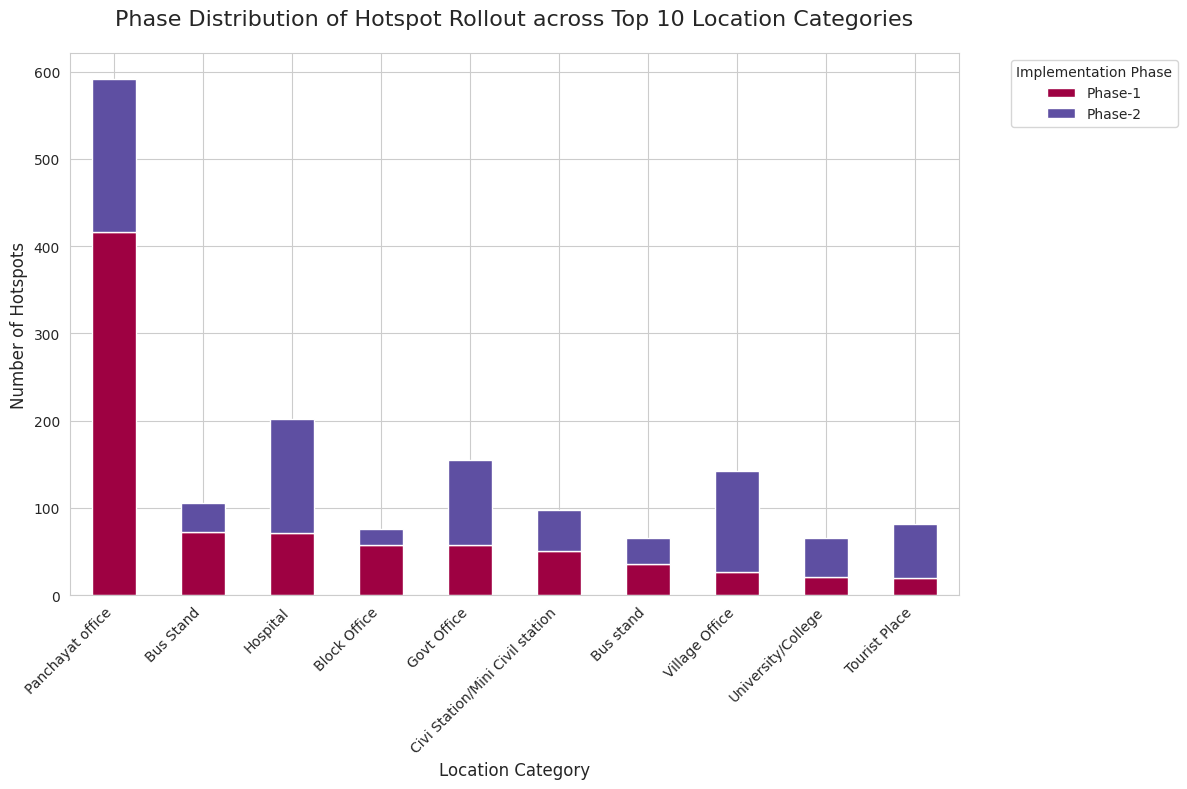

In [13]:
def analyze_category_phase_distribution(data, top_n=10):
    """Calculates and visualizes the phase distribution within the top N location categories using a stacked bar chart."""

    # 1. Get the top N categories
    top_categories_list = data['Location_Category'].value_counts().head(top_n).index.tolist()

    # 2. Filter data for only the top categories
    filtered_data = data[data['Location_Category'].isin(top_categories_list)]
    
    # 3. Create a cross-tabulation (contingency table)
    # This counts how many hotspots of each category fall into each phase
    category_phase_cross = pd.crosstab(
        filtered_data['Location_Category'], 
        filtered_data['Phase']
    ).sort_values(by='Phase-1', ascending=False) # Sort by Phase-1 count to potentially highlight initial priority
    
    print(f"\n--- 4. Phase Distribution within Top {top_n} Categories Summary (Stacked Bar Data) ---")
    print(category_phase_cross.to_markdown(numalign="left", stralign="left"))

    # 4. Plotting the data as a Stacked Bar Chart
    plt.figure(figsize=(12, 8))
    
    # Use the crosstab result directly for plotting
    category_phase_cross.plot(
        kind='bar', 
        stacked=True, 
        figsize=(12, 8), 
        colormap='Spectral', # Use a distinct color map for phases
        ax=plt.gca() # Use the current figure/axes
    )

    plt.title(f'Phase Distribution of Hotspot Rollout across Top {top_n} Location Categories', fontsize=16, pad=20)
    plt.xlabel('Location Category', fontsize=12)
    plt.ylabel('Number of Hotspots', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Implementation Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

analyze_category_phase_distribution(df)